In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_regression


####### Load the data from GitHub repo
def getData():
    """
    get data
    """

    url = 'https://raw.githubusercontent.com/beckallen77/CS4347_ML_Project/main/data/housing.csv'
    data = pd.read_csv(url, names=['longitude', 'latitude', 'housing_median_age',
                                   'total_rooms','total_bedrooms','population','households',
                                   'median_income','median_house_value','ocean_proximity'])
    return data

## Add these lines to turn off the warnings
import warnings
warnings.filterwarnings("ignore")

train = getData()
train = train.dropna(axis=0)




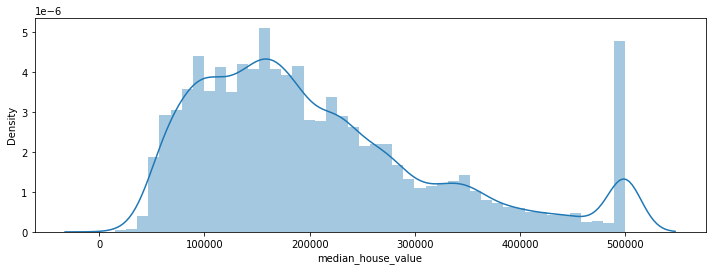

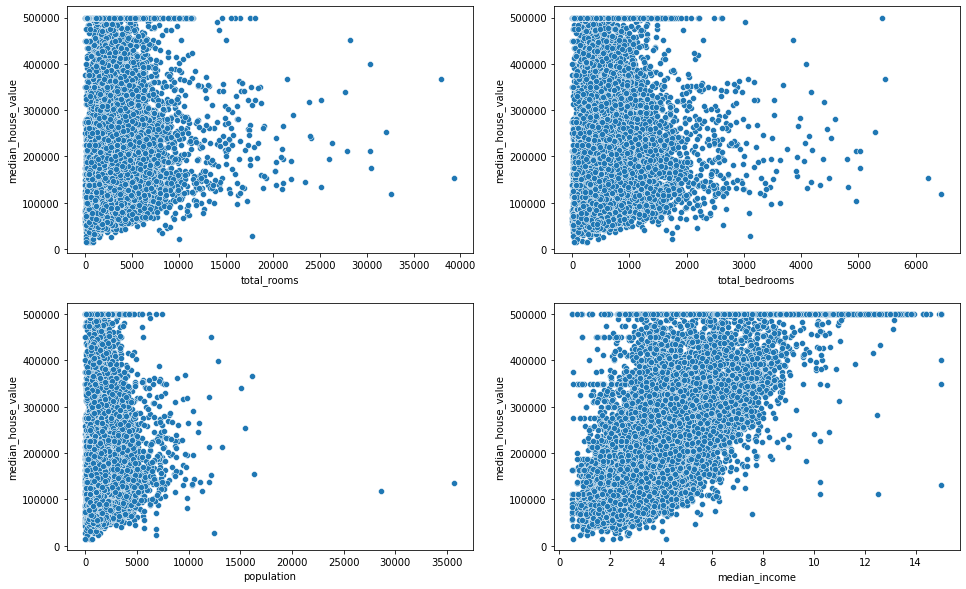

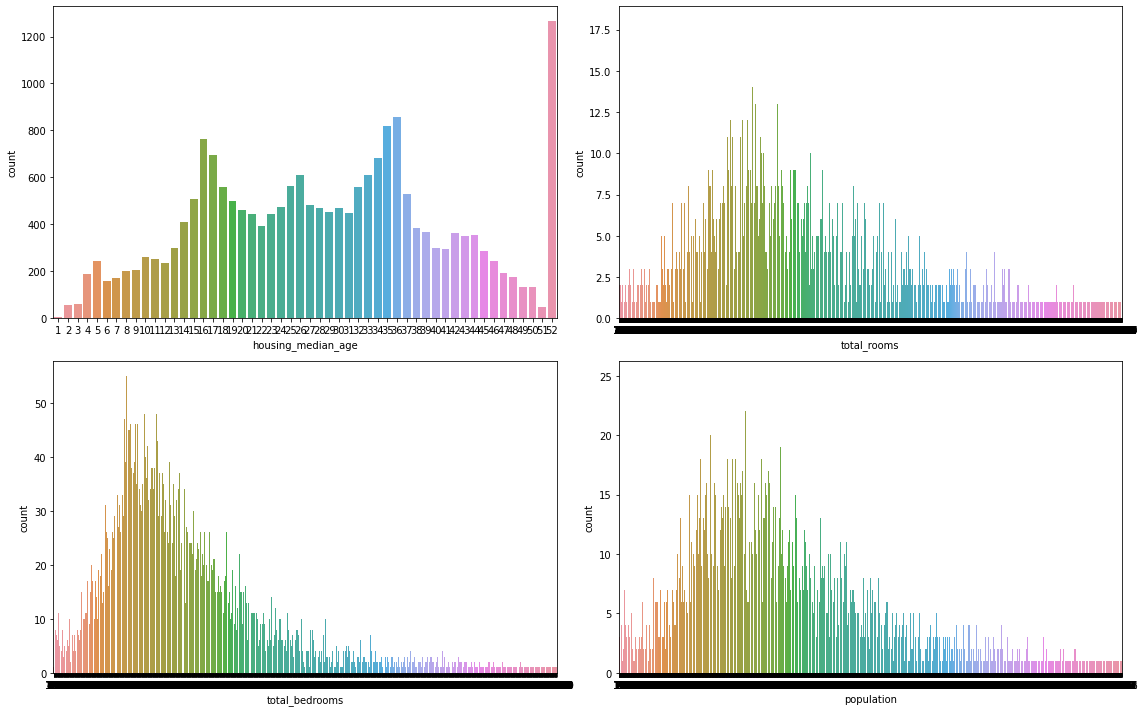

In [36]:
def visualizeData(train):
    #visualizing house prices
    fig = plt.figure(figsize=(10,7))
    fig.add_subplot(2,1,1)
    sns.distplot(train['median_house_value'])
    plt.tight_layout()

    #visualizing square footage of (home,lot,above and basement)
    fig = plt.figure(figsize=(16,10))
    fig.add_subplot(2,2,1)
    sns.scatterplot(train['total_rooms'], train['median_house_value'])
    fig.add_subplot(2,2,2)
    sns.scatterplot(train['total_bedrooms'],train['median_house_value'])
    fig.add_subplot(2,2,3)
    sns.scatterplot(train['population'],train['median_house_value'])
    fig.add_subplot(2,2,4)
    sns.scatterplot(train['median_income'],train['median_house_value'])

    #visualizing housing_median_age, total_rooms, total_bedrooms, population
    fig = plt.figure(figsize=(16,10))
    fig.add_subplot(2,2,1)
    sns.countplot(train['housing_median_age'])
    fig.add_subplot(2,2,2)
    sns.countplot(train['total_rooms'])
    fig.add_subplot(2,2,3)
    sns.countplot(train['total_bedrooms'])
    fig.add_subplot(2,2,4)
    sns.countplot(train['population'])
    plt.tight_layout()
    plt.show()

visualizeData(train)

In [37]:
##### split train Data into test & train sets

train_Y = train.median_house_value
train_predictor_columns = ['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']
#train_predictor_columns = ['longitude', 'latitude','median_income']  # top 3 features rated by importance slightly enhances the accuracy 
train_X = train[train_predictor_columns]

testsize = 0.20
train_X, test_X, train_Y, test_Y = train_test_split(train_X, train_Y, test_size=testsize, random_state=101)


In [38]:
######   Label Encoder & Randome Forest Regressor
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
n = 0
for col in train_predictor_columns:
 print(train_predictor_columns[n])
 if train_predictor_columns[n] == type(object):
       le = LabelEncoder()
       train_predictor_columns[n] = le.fit_transform(train_predictor_columns[n])
 n = n+1


X, y = make_regression(n_samples=30000, n_features=12, n_informative=5, random_state=1)

### train the model
estimators = np.arange(1000)
scores = []
my_model = RandomForestRegressor(n_estimators=1000)
my_model.fit(train_X, train_Y)

scores.append(my_model.score(train_X, train_Y))

print("\n\nTraining accuracy: ", my_model.score(train_X,train_Y))
print("Test accuracy: ",my_model.score(test_X,test_Y))



longitude
latitude
housing_median_age
total_rooms
total_bedrooms
population
households
median_income
ocean_proximity


Training accuracy:  0.976545646587409
Test accuracy:  0.820660772240382


In [44]:

# get importance

importance = my_model.feature_importances_
# summarize feature 
print("\nFEATURE IMPORTANCE SCORES ")
print("-------------------------")
for i,v in enumerate(importance):
       #j = train_predictor_columns[i]
       print('Feature: %s, Score: %.5f' % (train_predictor_columns[i],v))


predictions = my_model.predict(train_X)





FEATURE IMPORTANCE SCORES 
-------------------------
Feature: longitude, Score: 0.15563
Feature: latitude, Score: 0.14428
Feature: housing_median_age, Score: 0.04960
Feature: total_rooms, Score: 0.02371
Feature: total_bedrooms, Score: 0.02192
Feature: population, Score: 0.03140
Feature: households, Score: 0.01998
Feature: median_income, Score: 0.51129
Feature: ocean_proximity, Score: 0.04219


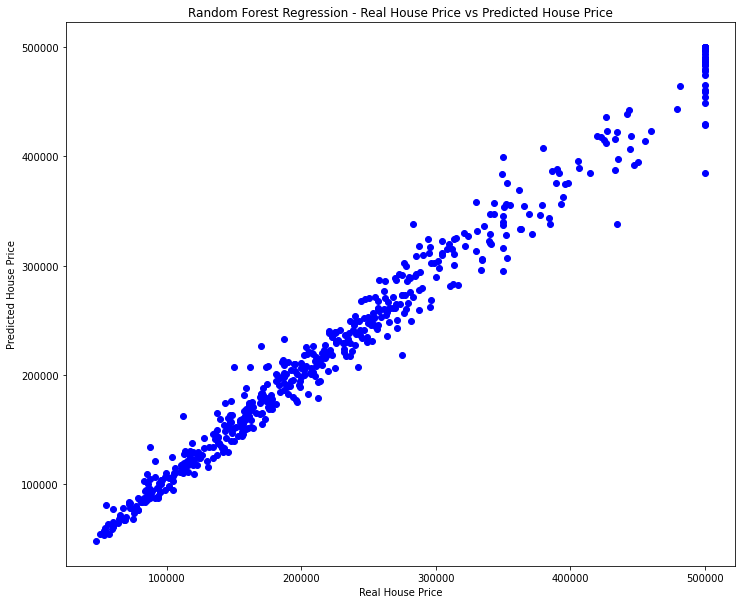

In [45]:
# find the correlation between real answer and prediction
from pydoc import help
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
#correlation = round(pearsonr(predictions, train_Y)[0], 5)
 
title_name = "Random Forest Regression - Real House Price vs Predicted House Price" # - correlation ({})".format(correlation)

# plot data
#simple_scatter_plot(train_Y, predictions, title_name, x_axis_label, y_axis_label)
#simple_scatter_plot(train_Y, predictions, output_filename, title_name, x_axis_label, y_axis_label)

# Make sure everything is an array to sample for chart
predict_price = np.array(predictions).ravel()
real_price = np.array(train_Y).ravel()

predict_price = predict_price[:550]  # first 550 entries
real_price = real_price[:550]  # first 550 entries

# initialize plot
fig, ax = plt.subplots(figsize=(12,10))
    

plt.scatter(real_price, predict_price, c='b')
#plt.legend()
plt.title(title_name)
plt.xlabel("Real House Price")
plt.ylabel("Predicted House Price")
# show plot
plt.show()

